# Supervised learning methods

In [2]:
#importing neccesary lib
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [3]:
#importing datasets
df = pd.DataFrame()

In [4]:
filename = 'winequality-white.csv'

In [5]:
df_white = pd.read_csv(filename , delimiter=';')

In [6]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df_white['type'] = '0'

In [8]:
df_white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0


In [9]:
df_red = pd.DataFrame()

In [10]:
filename = 'winequality-red.csv'

In [11]:
df_red = pd.read_csv(filename , delimiter=';')

In [12]:
df_red['type'] = '1'

In [13]:
df_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [14]:
#merging the two wine datasets
df = pd.concat([df_white , df_red])

In [15]:
#shuffling the rows so that the datasets row will have mix of red and white wine rows
df = df.sample(frac = 1,random_state= 10).reset_index(drop = True)

In [16]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,1
1,6.6,0.42,0.13,12.8,0.044,26.0,158.0,0.99772,3.24,0.47,9.0,5,0
2,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,1
3,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,1
4,6.6,0.19,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,0


In [17]:
names = df.columns

In [18]:
df.shape

(6497, 13)

In [19]:
df.isnull().values.any()

False

# Use regression to predict the alcohol level of the wine.

In [20]:
#x is the input features
x = np.array(df.drop(['alcohol'],1))

In [21]:
#y is the target 
y = np.array(df['alcohol'])

In [22]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso



In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [115]:
#Data pre processing scaling input features x
scaler = preprocessing.StandardScaler().fit(x)

In [116]:
x = scaler.transform(x)

# 1. Lasso regression

In [128]:
param_grid = {'alpha': np.linspace(0.0001, 1 )}

In [129]:
from sklearn.model_selection import GridSearchCV
grid_reg = GridSearchCV(Lasso(), param_grid, cv=5)

In [130]:
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-04, 2.05061e-02, 4.09122e-02, 6.13184e-02, 8.17245e-02,
       1.02131e-01, 1.22537e-01, 1.42943e-01, 1.63349e-01, 1.83755e-01,
       2.04161e-01, 2.24567e-01, 2.44973e-01, 2.65380e-01, 2.85786e-01,
       3.06192e-01, 3.26598e-01, 3.47004e-01, 3.67410e-01, 3.87... 8.77563e-01, 8.97969e-01,
       9.18376e-01, 9.38782e-01, 9.59188e-01, 9.79594e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [131]:
print("Test set score: {:.2f}".format(grid_reg.score(X_test, y_test)))

Test set score: 0.84


In [132]:
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_reg.best_score_))
print("Best estimator:\n{}".format(grid_reg.best_estimator_))

Best parameters: {'alpha': 0.0001}
Best cross-validation score: 0.87
Best estimator:
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


# Use binary classification to predict the type of wine.

In [187]:
#Here the red wine = 1 and white wine = 0. Using binary classification, we are going to predict the wine type(whether 0 or 1)
x = np.array(df.drop(['type'],1))
y = np.array(df['type'])

In [188]:
#Data pre processing scaling input features x
scaler = preprocessing.StandardScaler().fit(x)

In [189]:
x = scaler.transform(x)

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 1. LogisticRegression

In [191]:
#training the model
from sklearn.linear_model import LogisticRegression

In [192]:
param_grid = [
{'penalty': ['l1'],'C': np.linspace(0.0001, 10, 5 )},
{'penalty': ['l2'],'C': np.linspace(0.0001, 10, 5 )}]

In [193]:
grid_bin = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_bin.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1'], 'C': array([1.00000e-04, 2.50008e+00, 5.00005e+00, 7.50002e+00, 1.00000e+01])}, {'penalty': ['l2'], 'C': array([1.00000e-04, 2.50008e+00, 5.00005e+00, 7.50002e+00, 1.00000e+01])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [194]:
print("Test set score: {:.2f}".format(grid_bin.score(X_test, y_test)))
print("Best parameters: {}".format(grid_bin.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_bin.best_score_))
print("Best estimator:\n{}".format(grid_bin.best_estimator_))

Test set score: 0.99
Best parameters: {'C': 2.5000750000000003, 'penalty': 'l1'}
Best cross-validation score: 0.99
Best estimator:
LogisticRegression(C=2.5000750000000003, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


# 2. SVC classification

In [183]:
from sklearn.svm import SVC

In [250]:
param_grid = [{'kernel': ['rbf'],
'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
{'kernel': ['linear'],
'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

In [251]:
grid_svc = GridSearchCV(SVC(), param_grid, cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, {'kernel': ['linear'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [252]:
print("Test set score: {:.2f}".format(grid_svc.score(X_test, y_test)))
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Best estimator:\n{}".format(grid_svc.best_estimator_))

Test set score: 0.99
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 1.00
Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


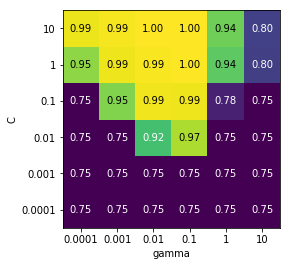

In [254]:
import mglearn
results = pd.DataFrame(grid_svc.cv_results_)
for kernal in results.param_kernel.unique():                                          #using data filters for the kernal
    kernal_filter = results.param_kernel == 'rbf'                                   #Choosing rbf kernal to display heatmap
    results_filtered = results[kernal_filter]                               #because rbf kernal has been selected best estimator
scores = np.array(results_filtered['mean_test_score']).reshape(6,6)
#scores.shape
C = [0.0001, 0.001, 0.01, 0.1, 1, 10]
gamma =  [0.0001, 0.001, 0.01, 0.1, 1, 10]
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=gamma,ylabel='C', yticklabels=C, cmap="viridis")

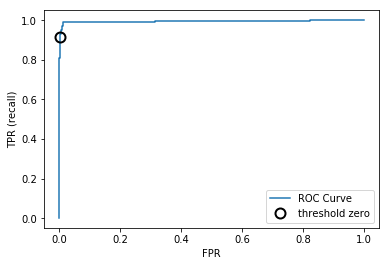

In [326]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

x = np.array(df.drop(['type'],1))
y = np.array(df['type'])

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

svc = SVC(C = 0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svc.fit(X_train,y_train)
pred = svc.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, pred , pos_label='1')

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [312]:
from sklearn.metrics import auc
svc_auc = auc(fpr,tpr)
print('The AUC value is %.3f' %svc_auc)

The AUC value is 0.995


In [324]:
x = np.array(df.drop(['type'],1))
y = np.array(df['type'])

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

param_grid = [{'kernel': ['rbf'],
'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
{'kernel': ['linear'],
'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]


grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)
#print("\nGrid-Search with AUC")
#print("Best parameters:", grid.best_params_)
#print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
#print("Test set AUC: {:.3f}".format(
#roc_auc_score(y_test, grid.decision_function(X_test),pos_label='1')))
#print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

ValueError: Data is not binary and pos_label is not specified

# Use multiclass classification to predict the quality of the wine.

In [1]:
#list of classes belonging to wine dataset
sorted(df.quality.unique())

NameError: name 'df' is not defined

In [151]:
x_mul = np.array(df.drop(['quality'],1))
y_mul = np.array(df['quality'])

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_mul, y_mul, test_size=0.33, random_state=42)

In [153]:
#Data pre processing scaling input features x
scaler = preprocessing.StandardScaler().fit(x_mul)

In [154]:
x_mul = scaler.transform(x_mul)

# 1. DecisionTreeClassifier

In [328]:
from sklearn.tree import DecisionTreeClassifier

In [329]:
param_grid = [ {'max_depth': np.arange(2, 10, 2), 'min_samples_split': np.arange(2, 10, 2), 'max_leaf_nodes' : np.arange(2, 10, 2)}]

In [330]:
#training the model
grid_mul = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_mul.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': array([2, 4, 6, 8]), 'min_samples_split': array([2, 4, 6, 8]), 'max_leaf_nodes': array([2, 4, 6, 8])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [331]:
print("Test set score: {:.2f}".format(grid_mul.score(X_test, y_test)))
print("Best parameters: {}".format(grid_mul.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_mul.best_score_))
print("Best estimator:\n{}".format(grid_mul.best_estimator_))

Test set score: 0.98
Best parameters: {'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_split': 2}
Best cross-validation score: 0.98
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
